In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the image of the car with license plate
img = cv2.imread('../DATA/car_plate.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

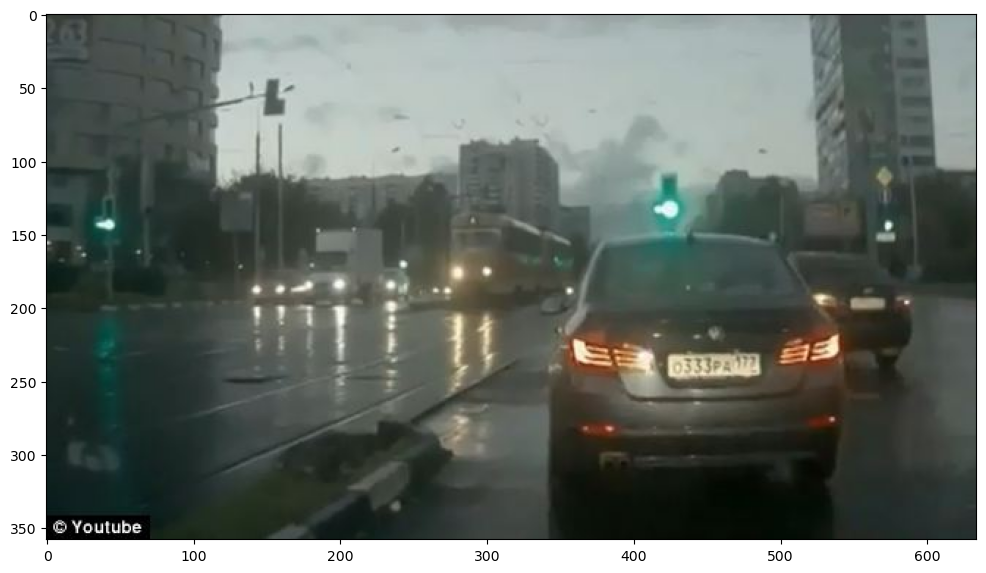

In [4]:
display(img)

Create a way to detect the license plate

In [5]:
license_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [12]:
def detect_plate(img):
    license_copy = img.copy()
    license_rect = license_cascade.detectMultiScale(license_copy, scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in license_rect:
        cv2.rectangle(license_copy, (x,y), (x+w, y+h), (255,0,0), 5)
    return license_copy

In [13]:
result = detect_plate(img)

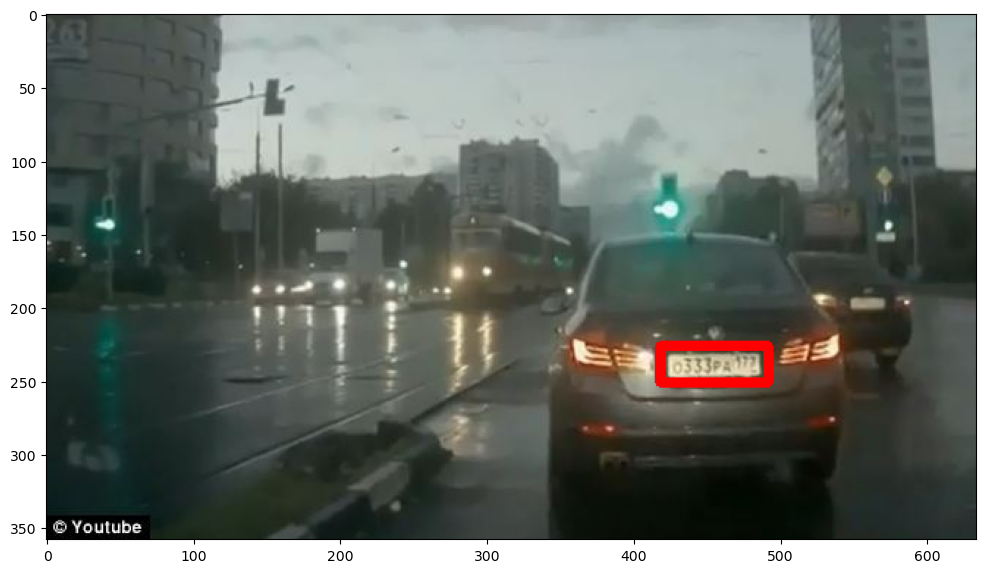

In [14]:
display(result)

Create a new function to both detect and blur the license plate

In [24]:
def detect_and_blur_plate(img):
    license_copy = img.copy()
    license_rect = license_cascade.detectMultiScale(license_copy, scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in license_rect:
        
        roi = license_copy[y:y+h, x:x+w]
        blurred_roi = cv2.medianBlur(roi, 7)
        license_copy[y:y+h, x:x+w] = blurred_roi
    return license_copy

In [25]:
result = detect_and_blur_plate(img)

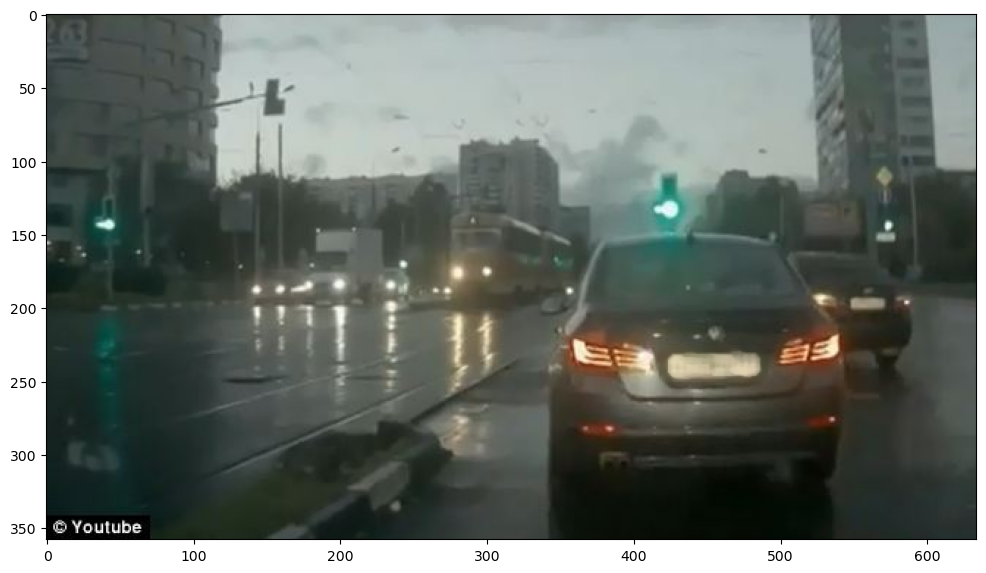

In [26]:
display(result)